In [1]:
import numpy as np
from Multiband import Multiband

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("../phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("../volume")
qv = np.loadtxt("../path_vol") 
phase_get = np.load("../phase_get.npy")
d = np.loadtxt("../distance")
# dr = np.loadtxt("dr")
# dr=dr/cir
straight_get = np.load("../straight_get.npy")

srl_get=np.load("../srl_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 12

speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

p=[0,0,0,0,1,0,0,1,0,0,1,0,0,1,0]

In [4]:
mb=Multiband(phase,[80,180],straight_get,p,d,lower,upper,speedVar[0], speedVar[1],vol,px)
mb._solve()

15 15
conflict(s): 0
status  = integer optimal solution
time    = 0.047 s.
problem = MILP
gap     = 0%

object value: 39.98669085098069


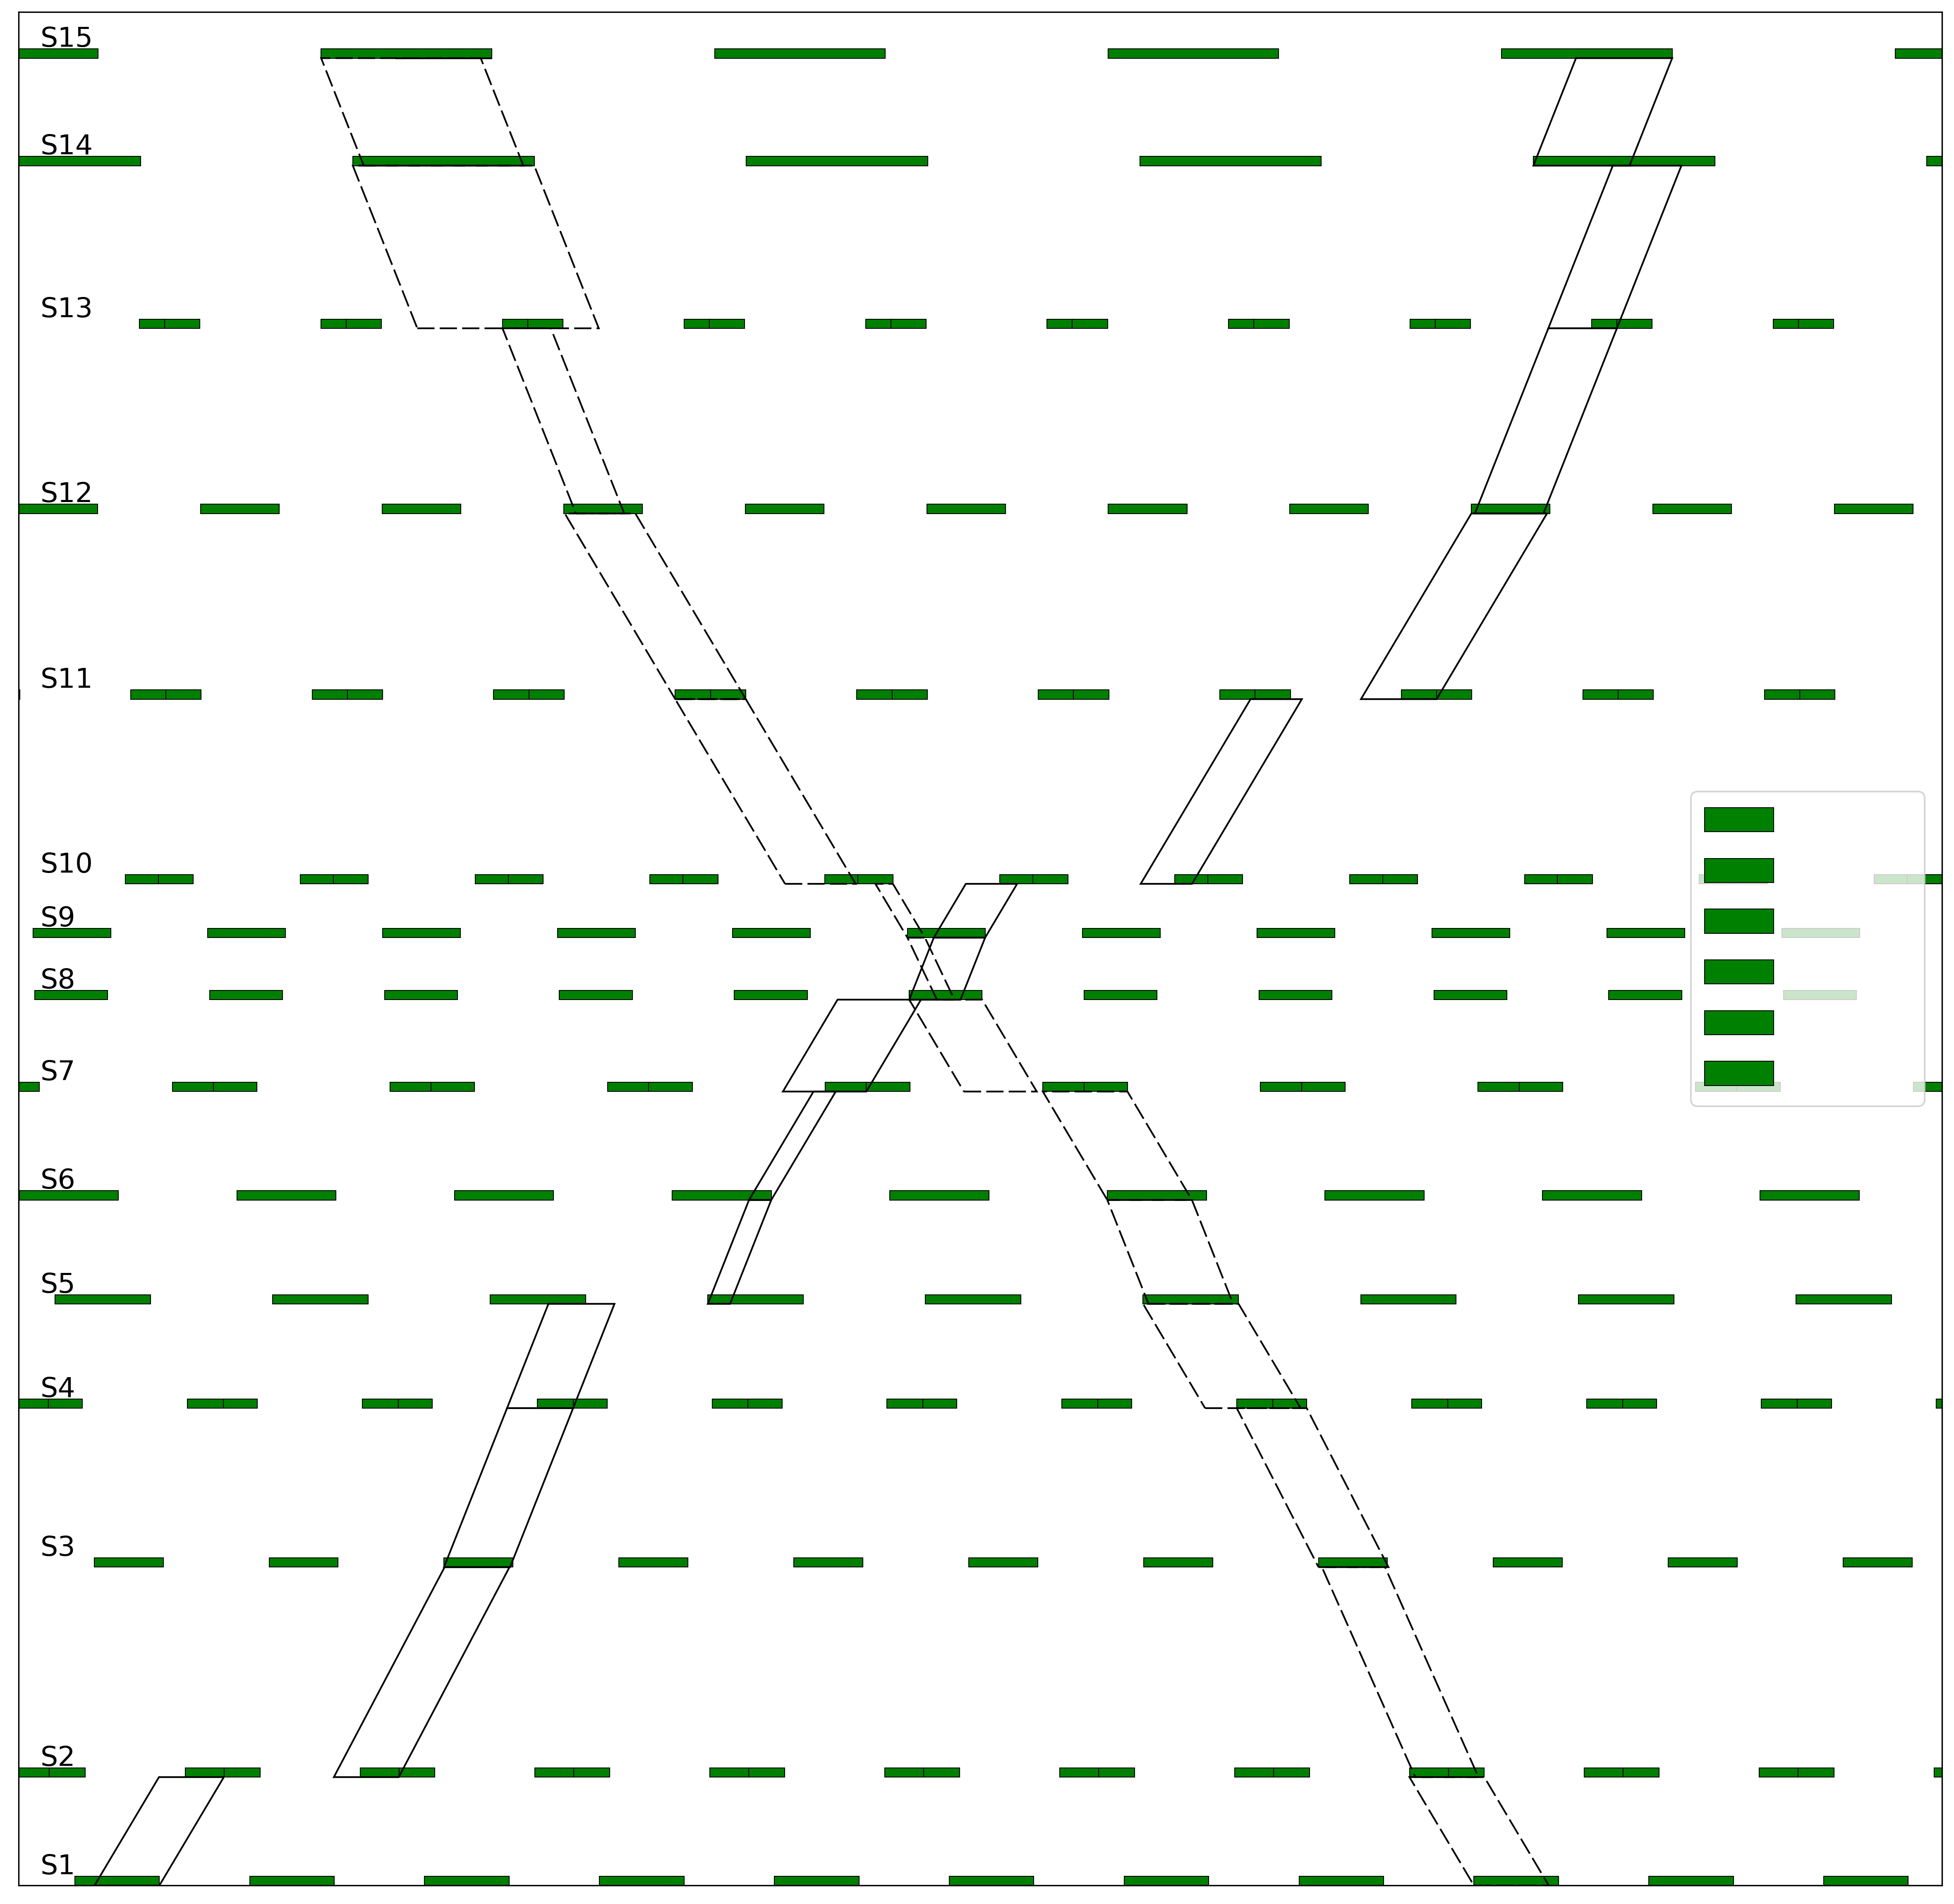

In [5]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1)) },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
mb.draw_car_bound("./时距图",colors,legends,2,linestyles)